

1.   Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2.   Plot bar charts showing impact of employee salaries on retention
3.   Plot bar charts showing corelation between department and employee retention
4.   Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/HR_dataset logistic regression.csv')
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [21]:
left0=df[df.left==0]
left0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [22]:
left0.shape

(11428, 10)

In [23]:
left1 = df[df.left==1]
left1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [24]:
left1.shape

(3571, 10)

**Average number for all columns**

In [25]:
df.groupby('left').mean()

<ipython-input-25-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Satisfaction Level:** Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66).The difference of 0.22 in satisfaction level suggests that this difference in satisfaction is not minor but is notably large, indicating that satisfaction level is an important factor to consider in understanding why some employees are leaving the company.

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207 i.e (e.g., hours worked per month)).This could be an indicator of overwork or burnout, which might be a reason for leaving.

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm ,i.e, promotions seem to have a positive impact on employee retention.

In [26]:
df.groupby('left').describe()

satisfaction_level                                                    \
                  count      mean       std   min   25%   50%   75%   max   
left                                                                        
0               11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00   
1                3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92   

     last_evaluation            ... Work_accident      promotion_last_5years  \
               count      mean  ...           75%  max                 count   
left                            ...                                            
0            11428.0  0.715473  ...           0.0  1.0               11428.0   
1             3571.0  0.718113  ...           0.0  1.0                3571.0   

                                                   
          mean       std  min  25%  50%  75%  max  
left                                               
0     0.026251  0.159889  0.0  0.0  0.0  0.0  1.0  
1     0.005321  0.072759  0.0  0.0  0.0  0.0  1.0  

[2 rows x 56 columns]

In [41]:
average_projects_left = df[df['left'] == 1]['number_project'].mean()
average_projects_left

3.8555026603192384

In [39]:
average_projects_stayed = df[df['left'] == 0]['number_project'].mean()
average_projects_stayed

3.786664333216661

In [40]:
diff = average_projects_left- average_projects_stayed
diff

0.0

**From above we can say that This means that, on average, employees who left the organization were assigned slightly more projects (approximately 3.86) compared to those who stayed (approximately 3.79). While the difference is not substantial, it does suggest that employees who left may have had a slightly higher workload in terms of the number of projects they were handling.**

In [43]:
average_last_evaluation_left = df[df['left'] == 0]['last_evaluation'].mean()
average_last_evaluation_left

0.7154733986699335

In [45]:
average_last_evaluation_stayed = df[df['left'] == 1]['last_evaluation'].mean()
average_last_evaluation_stayed

0.7181125735088211

Text(0, 0.5, 'retention')

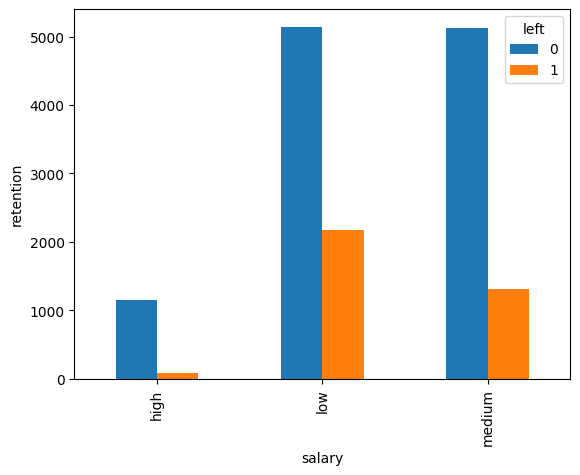

In [50]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.ylabel('retention')



1.   **Above bar chart shows employees with high salaries are likely to not leave the company**
2.   **pd.crosstab(df.salary, df.left):** This part of the code calculates a cross-tabulation between the 'salary' and 'left' columns in your DataFrame ('df'). A cross-tabulation (crosstab) is a way to summarize and count the occurrences of different combinations of two categorical variables



**Now Department wise employee retention rate**

<Axes: xlabel='Department'>

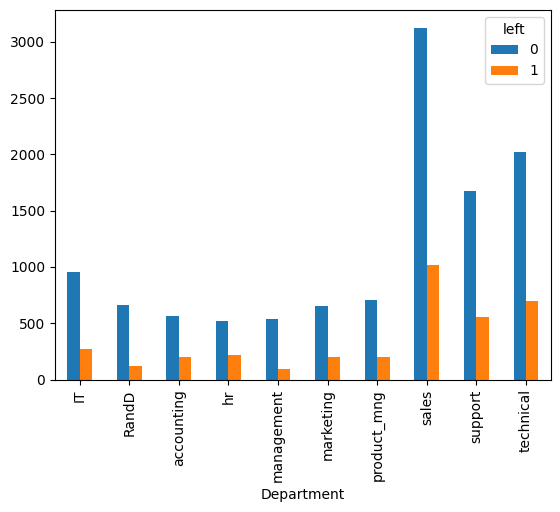

In [51]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

#From the data analysis so far we can conclude that we will use following variables as independant variables in our model


1.   **Satisfaction Level**
2.   **Average Monthly Hours**
3.   **Promotion Last 5 Years**
4.   **Salary**



In [53]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.**

In [54]:
salary_dummies = pd.get_dummies(subdf.salary,prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [56]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


**Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it**

In [57]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [58]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [59]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [83]:
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [85]:
model.score(X_test,y_test)

0.7782857142857142